In this tutorial we examine the effect of changing the target(s) on the results a horsetail matching optimization. 
We'll use TP3 from the demo problems. We also define a function for easy plotting using matplotlib.

In [40]:
from horsetailmatching import HorsetailMatching, UncertainParameter
from horsetailmatching.demoproblems import TP3

from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

def plotHorsetail(theHM, c='b'):
    (x, y), _, _ = theHM.getHorsetail()
    plt.plot(x, y, c=c)
    plt.plot([theHM.ftarget(yi) for yi in y], y, c=c, linestyle='dashed')
    plt.xlim([-10, 10])

In the following code we setup a horsetail matching optimization using test pro

  status: 1
    nfev: 21
   maxcv: 0.0
 success: True
     fun: 3.3407744022595023
       x: array(0.47959453124999996)
 message: 'Optimization terminated successfully.'
  status: 1
    nfev: 21
   maxcv: 0.0
 success: True
     fun: 4.7275757723930134
       x: array(0.788432421875)
 message: 'Optimization terminated successfully.'
  status: 1
    nfev: 23
   maxcv: 0.0
 success: True
     fun: 4.5243309538419538
       x: array(0.86826640625)
 message: 'Optimization terminated successfully.'


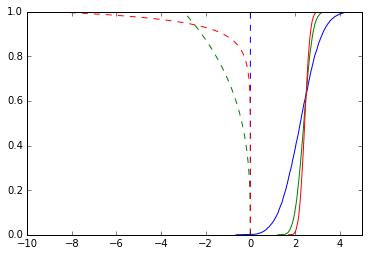

In [48]:
u1 = UncertainParameter('gaussian')

def standardTarget(h):
    return 0.

theHM = HorsetailMatching(TP3, u1, ftarget=standardTarget, samples_prob=5000)
solution1 = minimize(theHM.evalMetric, x0=0.6, method='COBYLA',
        constraints=[{'type': 'ineq', 'fun': lambda x: x}, {'type': 'ineq', 'fun': lambda x: 1-x}])
theHM.evalMetric(solution1.x)
print(solution1)
plotHorsetail(theHM, c='b')

def riskAverseTarget(h):
    return 0. - 3.*h**3.

theHM.ftarget=riskAverseTarget
solution2 = minimize(theHM.evalMetric, x0=0.6, method='COBYLA',
        constraints=[{'type': 'ineq', 'fun': lambda x: x}, {'type': 'ineq', 'fun': lambda x: 1-x}])
theHM.evalMetric(solution2.x)
print(solution2)
plotHorsetail(theHM, c='g')

def veryRiskAverseTarget(h):
    return 1. - 10.**h**10.

theHM.ftarget=veryRiskAverseTarget
solution3 = minimize(theHM.evalMetric, x0=0.6, method='COBYLA',
        constraints=[{'type': 'ineq', 'fun': lambda x: x}, {'type': 'ineq', 'fun': lambda x: 1-x}])
theHM.evalMetric(solution3.x)
print(solution3)
plotHorsetail(theHM, c='r')

plt.xlim([-10, 5])
plt.plot()
plt.show()